In [1]:
using Convex
using SCS
using PyPlot
solver = SCSSolver(verbose=0);
set_default_solver(solver);

INFO: Loading help data...


In [2]:
function solve_mu(mu)
    Cov = [ 0.0064  0.0008 -0.0011  0.0;
            0.0008  0.0025     0.0  0.0;
           -0.0011    0.0    0.004  0.0;
               0.0    0.0      0.0  0.0]

    p = [0.12;
         0.10;
         0.07;
         0.03]

    q = [1;1;1;1]
    
    x = Variable(4)
    problem = minimize(mu*quad_form(x,Cov) - p'*x)

    problem.constraints += [q'*x == 1; x >= 0]
    solve!(problem);
    
    expected = p' * x.value;
    deviation = sqrt(x.value' * Cov * x.value);
    return problem.optval,x.value,expected[1],deviation[1]
end

solve_mu (generic function with 1 method)

In [12]:
N = 50
mu = logspace(-5,5,N)
pstar = zeros(N)
expected = zeros(N)
deviation = zeros(N)
x = zeros(N,4)

for i in 1:N
    pstar[i],x[i,:],expected[i],deviation[i] = solve_mu(mu[i])
end

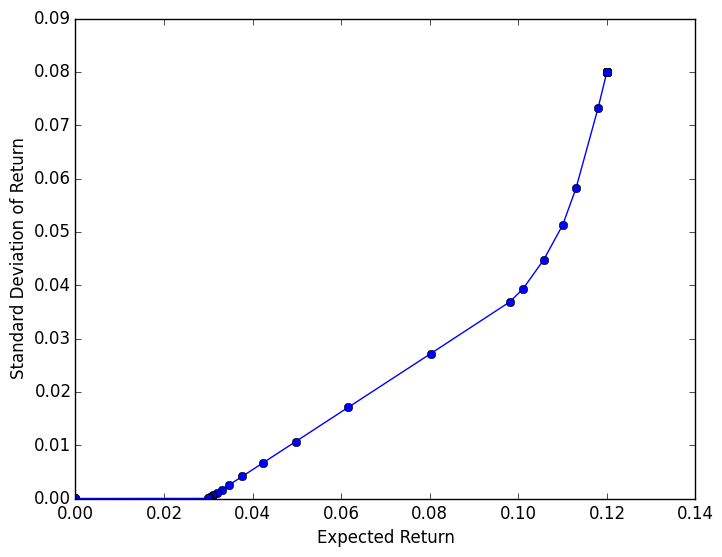

PyObject <matplotlib.text.Text object at 0x7f080734db50>

In [13]:
figure()
plot(expected,deviation,"-ob")

xlabel("Expected Return")
ylabel("Standard Deviation of Return")

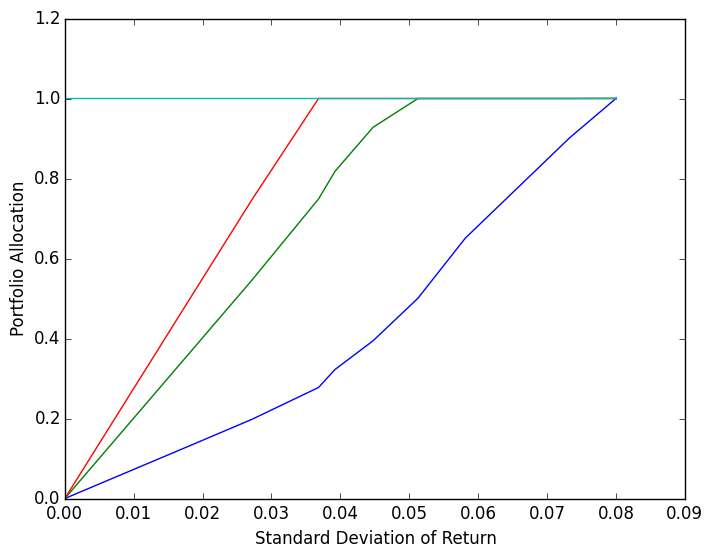

In [15]:
figure()
plot(deviation,cumsum(x,2))
xlabel("Standard Deviation of Return")
ylabel("Portfolio Allocation")
show()

In [49]:
function solve_socp_nu(nu)
    Cov = [ 0.0064  0.0008 -0.0011  0.0;
            0.0008  0.0025     0.0  0.0;
           -0.0011    0.0    0.004  0.0;
               0.0    0.0      0.0  0.0]
    
    sqrtCov = convert(Array{Float64,2},sqrtm(Cov))

    p = [0.12;
         0.10;
         0.07;
         0.03]
    
    q = [1;1;1;1]
    
    x = Variable(4)
    problem = minimize(-p'*x)
    problem.constraints += [vecnorm(sqrtCov*x,2) <= (p'*x)/erfcinv(nu), q'*x == 1, x >= 0]
    solve!(problem)
    
    expected = p' * x.value
    deviation = sqrt(x.value' * Cov * x.value)
    return problem.optval,x.value,expected[1],deviation[1]
end

solve_socp_nu (generic function with 1 method)

In [53]:
N = 100
nu = linspace(0.1,0.4,N)
pstar = zeros(N)
expected = zeros(N)
deviation = zeros(N)
x = zeros(N,4)

for i in 1:N
    pstar[i],x[i,:],expected[i],deviation[i] = solve_socp_nu(nu[i])
end

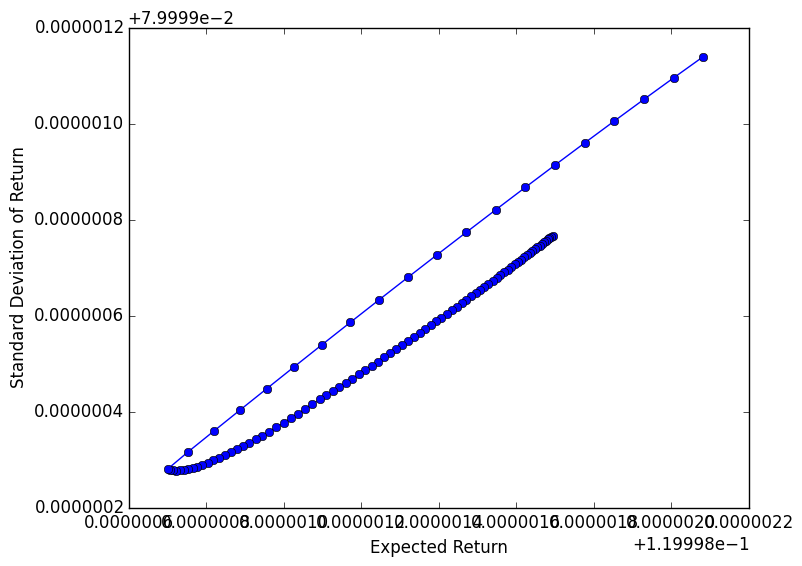

PyObject <matplotlib.text.Text object at 0x7f0806dcad50>

In [54]:
figure()
plot(expected,deviation,"-ob")

xlabel("Expected Return")
ylabel("Standard Deviation of Return")

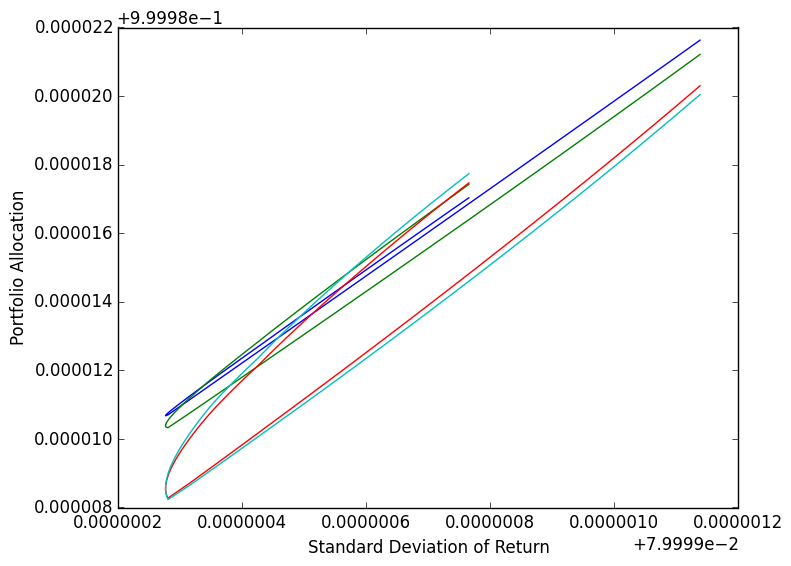

In [55]:
figure()
plot(deviation,cumsum(x,2))
xlabel("Standard Deviation of Return")
ylabel("Portfolio Allocation")
show()